In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Load Data

In [2]:
data = pd.read_csv('./ex1data1.txt', 
                   sep=',', 
                   header=None,
                   names=['population', 'profit'])
data

,population,profit
0,6.1101,17.59200
1,5.5277,9.13020
2,8.5186,13.66200
3,7.0032,11.85400
4,5.8598,6.82330
...,...,...
92,5.8707,7.20290
93,5.3054,1.98690
94,8.2934,0.14454
95,13.3940,9.05510


In [3]:
X = data.population.values
y = data.profit.values.reshape(97,1)

### Plotting Data

<AxesSubplot:xlabel='population', ylabel='profit'>

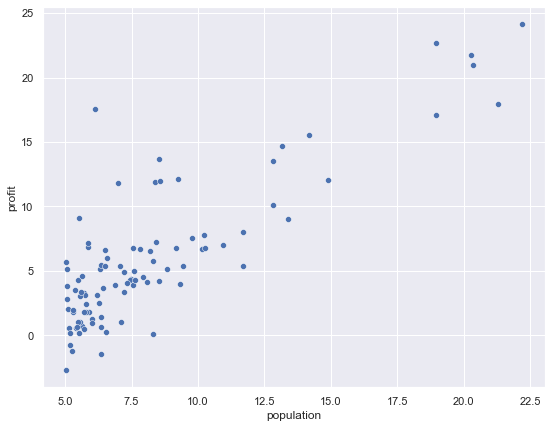

In [4]:
sns.set(rc={"figure.figsize":(9, 7)})
sns.scatterplot(data=data, 
                x='population',
                y='profit', 
                marker='o')

### Cost and Gradient Descent

In [5]:
X.size

97

In [6]:
X_b = np.c_[np.ones((X.size,1)), X] # add ones to the original X
thetas = np.zeros((2,1))

In [7]:
# define the Cost Function (Squared Error)
def computeCost(X, y, theta):
    m = X.shape[0]
    
    return np.sum(((X_b.dot(theta) - y)**2)) / 2*m / 10_000

In [8]:
J = computeCost(X_b, y, thetas)
J

30.177235305298044

In [9]:
thetas.shape

(2, 1)

In [10]:
computeCost(X_b, y, np.array([[-1], [2]]))

51.03672598666544

In [11]:
# Some gradient descent settings
iterations = 1500
alpha = 0.01 # learning rate
theta = np.random.randn(2,1) # random initialization of theta

In [12]:
#best theta
def gradientDescent(X, y, theta, alpha, iterations):
    for iteration in range(iterations):
        gradients = 2/(X.shape[0]) * X.T.dot(X.dot(theta) - y)
        theta = theta - (alpha * gradients)
    return theta

In [13]:
best_theta = gradientDescent(X_b, y, theta, alpha, iterations)

In [14]:
best_theta

array([[-3.89011906],
       [ 1.19246485]])

### Plot Linear Fit Curve

In [22]:
# predict values for population 35,000 and 70,000
preds = np.array([[1, 3.5], [1, 7]]).dot(best_theta)
preds * 10_000

array([[ 2835.07924469],
       [44571.34911216]])

In [23]:
predictions = X_b.dot(best_theta)

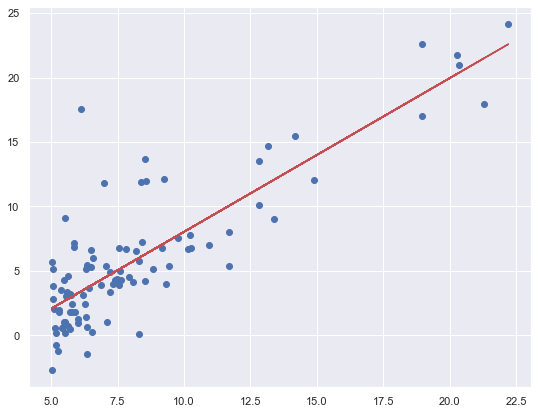

In [24]:
plt.scatter(X, y.flatten())
plt.plot(X, predictions.flatten(), "r-")

(-15.0, 15.0)

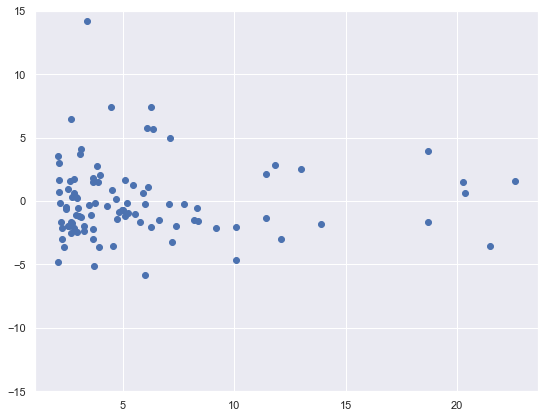

In [30]:
# predictions vs residuals

residuals = y - predictions

plt.scatter(predictions, residuals)
plt.ylim(-15, 15)

array([-0.09899787])

In [32]:
from sklearn.linear_model import LinearRegression

In [33]:
lin_reg = LinearRegression()
lin_reg.fit(X_b, y)

LinearRegression()

In [34]:
lin_reg.coef_

array([[0.        , 1.19303364]])

In [35]:
lin_reg.intercept_

array([-3.89578088])

In [38]:
sk_preds = lin_reg.predict(X_b)

(-15.0, 15.0)

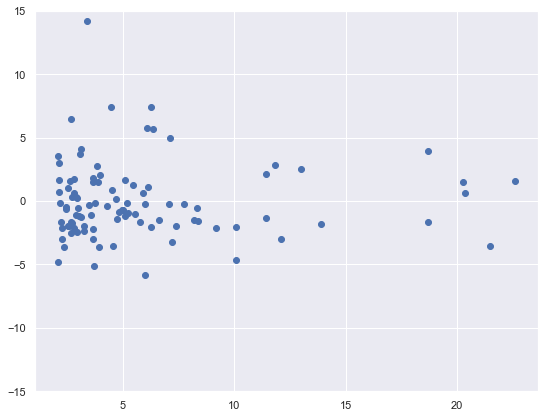

In [40]:
sk_resid = y - sk_preds

plt.scatter(sk_preds, sk_resid)
plt.ylim(-15, 15)